<h1><u>PROYECTO</u>:</h1>
<center>
    <a href="https://automotorsqueretaro.negocio.site/">

# AUTOMOTORS Servicio Automotriz

### <b>IDFORIDEAS - #idea6</b><br />

## Año 2022
<br /><br/>
    </a>
</center>
<center>

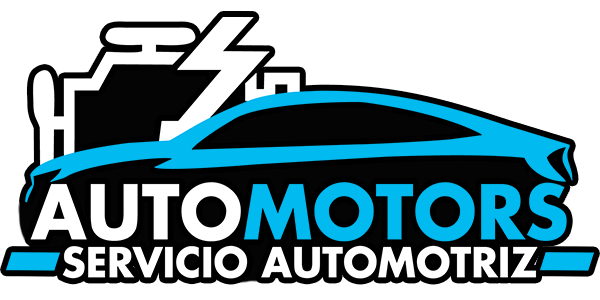

</center>

### <i>Agustín F. Stigliano - Python Developer  |  Data Scientist</i>

<div>
    <h2><u>TEMAS</u>:</h2>
    <center>

## Análisis comercial de la empresa
## Time Series - Data Science - Machine Learning

</center>    
</div><br />
<div>
    <h2><u>CONTENIDO</u>:</h2>
        <ol>
            <li>Consigna del cliente</li>
            <li>Introducción a la empresa</li>
            <li>Desarrollo del proyecto</li>
            <li>Conclusión</li>
        </ol>
</div>

<div>
    <h1>1. Consigna</h1>
    <a href="id_for_ideas/consignas.pdf">Puede acceder a la consigna AQUI</a>
</div>

##    Resumen

### Descripción del proyecto
Nuestro cliente es una <b>empresa Colombiana</b> que ofrece a sus clientes <b>productos y servicios del rubro automotríz</b>.<br />
Contamos con datos internos de la empresa como "Ventas" y "Empleados".<br/>
Requieren analizar el impacto de la pandemia para evaluar si vender la empresa, si quiebra o si salir a buscar inversores para expansión del negocio hacia otros países.



<div>
    <h1>1. Consigna</h1>
    <a href="id_for_ideas/consignas.pdf">Puede acceder a la consigna AQUI</a>
</div>

### Objetivo
El cliente necesita contar con toda la información ya analizada para tomar una decisión final.<br />

### Consideraciones
<ul>
    <li>La decisión de la empresa tiene que verse reflejada tanto en la rentabilidad, como también en el manejo y cantidad de personal.</li>
<li>Expresar los valores en unidades de dolar (hacer conversión con peso colombiano).</li>
    </ul>
</div>

<h1>2. Introducción a la empresa</h1>


In [1]:
# INTRODUCCION A LA EMPRESA
from paquete_proyecto.data_report.tools import cargar_objeto, enumerar_figuras
from paquete_proyecto.data_report.plots import VisualProcessor, GraphUploader

### 2.1 Ventas Totales

Nuestro cliente viene operando desde el año 2016. 
Las ventas han ido incrementandose de manera constante.
A partir del año 2020 las ventas cayeron.
Los pronósticos de ventas se asemejan al del comienzo del 2016.

In [2]:
processor_1 = cargar_objeto("obj_1_Ventas_totales.pickle")
plotter_1 = GraphUploader(processor=processor_1)
enumerar_figuras(plotter_1.show_all)

Figura 1


### 2.2 Familia

Referido a la variable familia, son aquellos rubros comerciales especializados dentro de la empresa.
Estas son:<br />
    - LLANTA<br />
    - LUBRICANTES<br />
    - FILTROS<br />
    - SERVICIOS<br />
    - REENCAUCHE
    
Consideramos que las primeras tres pertencen a la hiper-categoría "productos" y las últimas dos a "servicios".

In [3]:
processor_2 = cargar_objeto("obj_2_Ventas_acumuladas_simples.pickle")
processor_3 = cargar_objeto("obj_3_Ventas_acumuladas_apiladas.pickle")
processor_4 = cargar_objeto("obj_4_bar.pickle")
processor_5 = cargar_objeto("obj_5_hist.pickle")

In [4]:
plotter_2 = GraphUploader(processor = processor_2)
plotter_3 = GraphUploader(processor = processor_3)
plotter_4 = GraphUploader(processor = processor_4)
plotter_5 = GraphUploader(processor = processor_5)

In [5]:
figure = "Familia"
plots = [plotter_2, plotter_3, plotter_4, plotter_5]
for plot in plots:
    enumerar_figuras(plot.set_figure(figure=figure).show)

Figura 2


Figura 3


Figura 4


Figura 5


In [6]:
for plot in plots:
    plot.show_figures()

Figures: dict_keys(['Empleado', 'Familia', 'category1'])
Figures: dict_keys(['Empleado', 'Familia', 'Localidad', 'Sede', 'category1'])
Figures: dict_keys(['Familia', 'category1'])
Figures: dict_keys(['Familia', 'Localidad', 'Sede', 'category1', 'category2'])


##  SEDE 

In [7]:
# TODO: si la Figure no está entonces te fuerza a elejir una

figure = "Sede"
for plot in plots:
    enumerar_figuras(plot.set_figure(figure=figure).show)

Figura 6


Figura 7
Figura 8


Figura 9


1) Venta Total<br />
4) Cantidad de Elementos vendidos<br />

2) Ventas totales por Sedes en cada Rubro o Familia y Servicios (iter_sum)<br />
5) Cantidad de Servicios Ofrecidos (iter_count)<br />


3) Ganancia Facturación Total de Servicios<br />
6) Ventas realizadas por sus empleados<br />
7) Cantidad de Sedes o ubicaciones disponibles<br />
8) Ranking de Ventas / Servicios de Empleados<br />

## 2.1 Descripción de la empresa
Empresa Colombiana automotríz con franquicias ofrece:<br /><br />
<div>
    <h5><b>1) SERVICIOS</b></h5>
    Más de 130 servicios personalizados! Entre ellos se encuentra:
    <ul>
        <li>Alineacion y balanceo de tu automóvil, camioneta o camión</li>
        <li>Reparación de llantas</li>
        <li>Atención y ajuste del motor, las suspensiones y los frenos</li>
        <li>Contratos de servicios para tu flota</li>
        <li>...</li>
    </ul>

**y mucho más!!**

</div><br />
<div>
    <h5><b>2) REENCAUCHE</b></h5>
    Servicio de Reencauche! Muchisima capacidad de reencauche del automotor, más de 268 modelos de reencauche!
</div><br /><br />

<div>
    <h5><b>3) FILTROS (FALTA APLICAR REGEX PARA DIFERENCIAR AIRE Y ACEITE)</b></h5>
    Venta de productos! Más de 368 tipos de filtros. No sabemos cual es cual.
</div><br /><br />

<div>
    <h5><b>4) LLANTAS</b></h5>
    Venta de productos! Más de 973 estilos de llantas a tu medida!
</div><br /><br />

<div>
    <h5><b>5) LUBRICANTES</b></h5>
    Venta de productos! Tenemos 75 productos lubricantes para que puedas reducir la fricción de las partes móviles y cuidar al máximo el estado mecánico de tus afectos!
    <ul>
        <li>Aceite marca Mobil</li>
        <li>Marcas importadas: liqui moly</li>
        <li>Motul para tu moto</li>
        <li>...</li>
    </ul>
</div>
    
**y mucho más!!**




## 2.2 Etapas en el desarrollo de código


### 2.2.1 DATA FEED: Descripción del acondicionamiento del dataset original


**1ro)** <br />
Se aplica la función **"importar_databases()"** (dentro del **"paquete_proyecto"** hay un módulo llamado **"iniciando"**, ahí dentro está el fichero **"bases.py"**), que carga los datos del ".csv", y pasan por una serie de tratamientos, primero manual, y posterior otro automátizado para estandarizar los tipos de variable de cada columna.

**2do)** <br />
Luego de una inspección con el módulo **"herramientas"**, fichero **"data_info.py"** se comprueba el estado de los datos, y finalmente se realizan ajustes finales desde **"iniciando"**, **"bases.py"**, **"ajustar_tipos()"**.

<br/><br/>


    Estructura de ficheros:

            (I)  "paquete_proyecto.iniciando":

                  - "bases.py": 
                        Contiene la función "importar_databases()" y "ajustar_tipos()" que usamos para iniciar el proyecto.


                  - Este módulo no es genérico, se desarrolló para el proyecto en cuestión.



            (II)  "paquete_proyecto.herramientas": 

                  - "type_adjust.py": 
                        Contiene la función "type_adjust()" que estandariza el criterio de selección del tipo de variable para cada columna.

                  - "data_info.py": 
                        Contiene la función "data_info()" que facilita el análisis del dataset de trabajo.

                  - "extra.py": 
                        Son funciones que se utilizan sobre otros ficheros de los módulos, no sobre el proyecto en sí.

                  - Este módulo es genérico, puede ser utilizado en otros proyectos.
<br />

### 2.2.2 DATA PREPARE: Descripción del tratamiento del dataset de trabajo

**1ro)**<br />
AGREGAR COLUMNA "Ventas_USD" QUE SEA  "Ventas" A LA COTIZACION DEL "USD" DE LA FECHA

Queremos expresar las **ventas** en **dólares**, para eso se diseña una función que consulte la cotización histórica del **peso colombiano** respecto del dolar a través de un **API** ligada al servicio de **Alpha Vantage**. Una véz obtenido el **histórico semanal** desde el año 2014 hasta 2022, se procede a seleccionar el rango que contempla el dataset de trabajo, que corresponde al período de **2016 al 2020**. Luego se añáde la columna **"Cotizacion_USD"** y se calcula la columnas **"Ventas_USD"**


**2do)**<br />
AGREGAR FILAS DE FECHAS FALTANTES Y GENERADOR DE MUESTRAS

Es evidente que aquellos días en los que no hubo transacciones comerciales son fechas faltantes en nuestro dataset, lo que ocurre es que por definición de series temporales un **"log"** o **"paso"** es un fragmento temporal que puede ser considerado un elemento discreto, único, y equidistante de su "log" precedente y posterior. Completar las fechas del dataset es fundamental si se quiere desarrollar algoritmos de **machine learning** que usen librerías para series temporales.

Además de lo recién mencionado, ocurre que algunos **indicadores acumulativos** serían poco representativos de los períodos de estancamiento comercial, ya que no reflejarían la cantidad de días consecutivos sin introducir nuevas transacciones al sistema. 

Y por último, es necesario que el dataset esté completo si se quiere desarrollar **forecasting** (pronósticos), debido a que el proceso de **cross validation** para optimizar los hiperparámetros de entrenamiento, requiere **folds** que cumplan con lo antes mencionado respecto a las series temporales.

<br /><br />

      Estructura de ficheros:

            (III)  "paquete_proyecto.preprocesamiento":

                  - "forex_api.py": 
                        Contiene "alpha_vantage_fx_api()" una función desarrollada de forma genérica para consultar el histórico diario, semanal o mensual de más de 180 divisas que cotizan en el mercado de FOREX.

                  - "cotizacion.py": 
                        Contiene dos funciones que funcionan juntas "criterio_valor_apertura(preparar_cotizacion())" que es un criterio para tratar los datos recibidos por la API, y contiene "agregar_cotizacion()" que añade la columna de cotización a un dataset de trabajo existente. 

                  - "muestreo.py": 
                        La función "complete_dates()" añade todas las fechas faltantes a un dataset con índice datetime. Y "timeseries_cv()" recibe parámetros que se introducen en "sklearn.model_selection.TimeSeriesSplit()" y devuelve una lista cuyos elementos son los datasets solicitados.
                  
                  - Este módulo es genérico, puede ser utilizado en otros proyectos.

### 2.2.3 DATA RESEARCH: Indicadores básicos

**1ro)**<br />
Se descubre que la variable **Familia** contiene las categorías de las actividades comerciales que ofrece la empresa, éstas son:

- SERVICIOS (servicio)
- REENCAUCHE (servicio)
- LLANTA (producto)
- FILTRO (producto)
- LUBRICANTES (producto)

Con la particularidad que sobre **SERVICIOS** se encuentran mal registrados algunas transacciones de **REENCAUCHE**. 

Para atender ello se procede a desarrollar una función que utilice **RegEx**, y de esa forma transladar los registros a la familia correcta.

Además, para profundizar el análisis se divide la familia **FILTRO** en dos subcategorias **FILTRO_AIRE** y **FILTRO_ACEITE** haciendo uso de la funcíón mencionada.

**2do)** <br />

Se procede a desarrollar los siguientes indicadores:

Venta Total<br />
Cantidad de Elementos vendidos<br />
Ganancia Facturación Total de Servicios<br />
Cantidad de Servicios Ofrecidos<br />
Cantidad de Sedes o ubicaciones disponibles<br />
Ventas totales por Sedes en cada Rubro o Familia y Servicios<br />
Ventas realizadas por sus empleados<br />
Ranking de Ventas / Servicios de Empleados<br />